
## Important aspects for Value forecasting

### Stationarity
Time series data is said to be <em>stationary</em> if it does <em>not</em> exhibit trends or seasonality. 
That is, the mean, variance and covariance should be the same for any segment of the series, and are not functions of time.<br>

### First Order Differencing
Non-stationary data can be made to look stationary through <em>differencing</em>. 
A simple method called <em>first order differencing</em> calculates the difference between consecutive observations.

### AutoCorrelation Plot

### Partial AutoCorrelation Plot
The partial autocorrelation at lag $k$ is the autocorrelation between $y_t$ and $y_{t+k}$ that is not accounted for by lags $1$ through $k−1$.


In [1]:
import dftest as dftest
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#import for DESCRIPTIVE STATISTICS 
from statsmodels.tsa.stattools import adfuller,kpss,coint,bds,q_stat,grangercausalitytests,levinson_durbin

ts = pd.read_csv('./data2.csv', header=0, parse_dates=[0], dayfirst=True, index_col=0)
ts.index
tsr = ts.resample(rule='20T').mean()

### Augmented Dickey-Fuller Test for Stationarity
A time series is <em>stationary</em> if the mean and variance are fixed between any two equidistant points. 

A times series that shows seasonality is <em>not</em> stationary.

A test for stationarity usually involves a unit root hypothesis test, where the null hypothesis $H_0$ is that the series is <em>nonstationary</em>, and contains a unit root. 

In the Augmented Dickey-Fuller Test the null hypothesis states that $\phi = 1$. The test return several values and, among these, we are interested in the p-value. If $p<0.05$ (a small value), then there is a strong evidence against the null hypothesis (reject the null hypothesis -> the dataset appears to have no unit root, and is stationary)
If the p-value obtained is greater than significance level of 0.05 and the ADF statistic is higher than any of the critical values, then the TS can be considered not-stationary

In [27]:
#Check Stationarity
adft = adfuller(tsr,autolag='AIC')

#print them with info
print('Augmented Dickey-Fuller Test Results')

out = pd.Series(adft[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])

for key,val in adft[4].items():
    out[f'critical value ({key})']=val
print(out)

Augmented Dickey-Fuller Test Results
ADF test statistic     -9.812328e+00
p-value                 5.614071e-17
# lags used             2.700000e+01
# observations          2.502000e+03
critical value (1%)    -3.432966e+00
critical value (5%)    -2.862696e+00
critical value (10%)   -2.567385e+00
dtype: float64


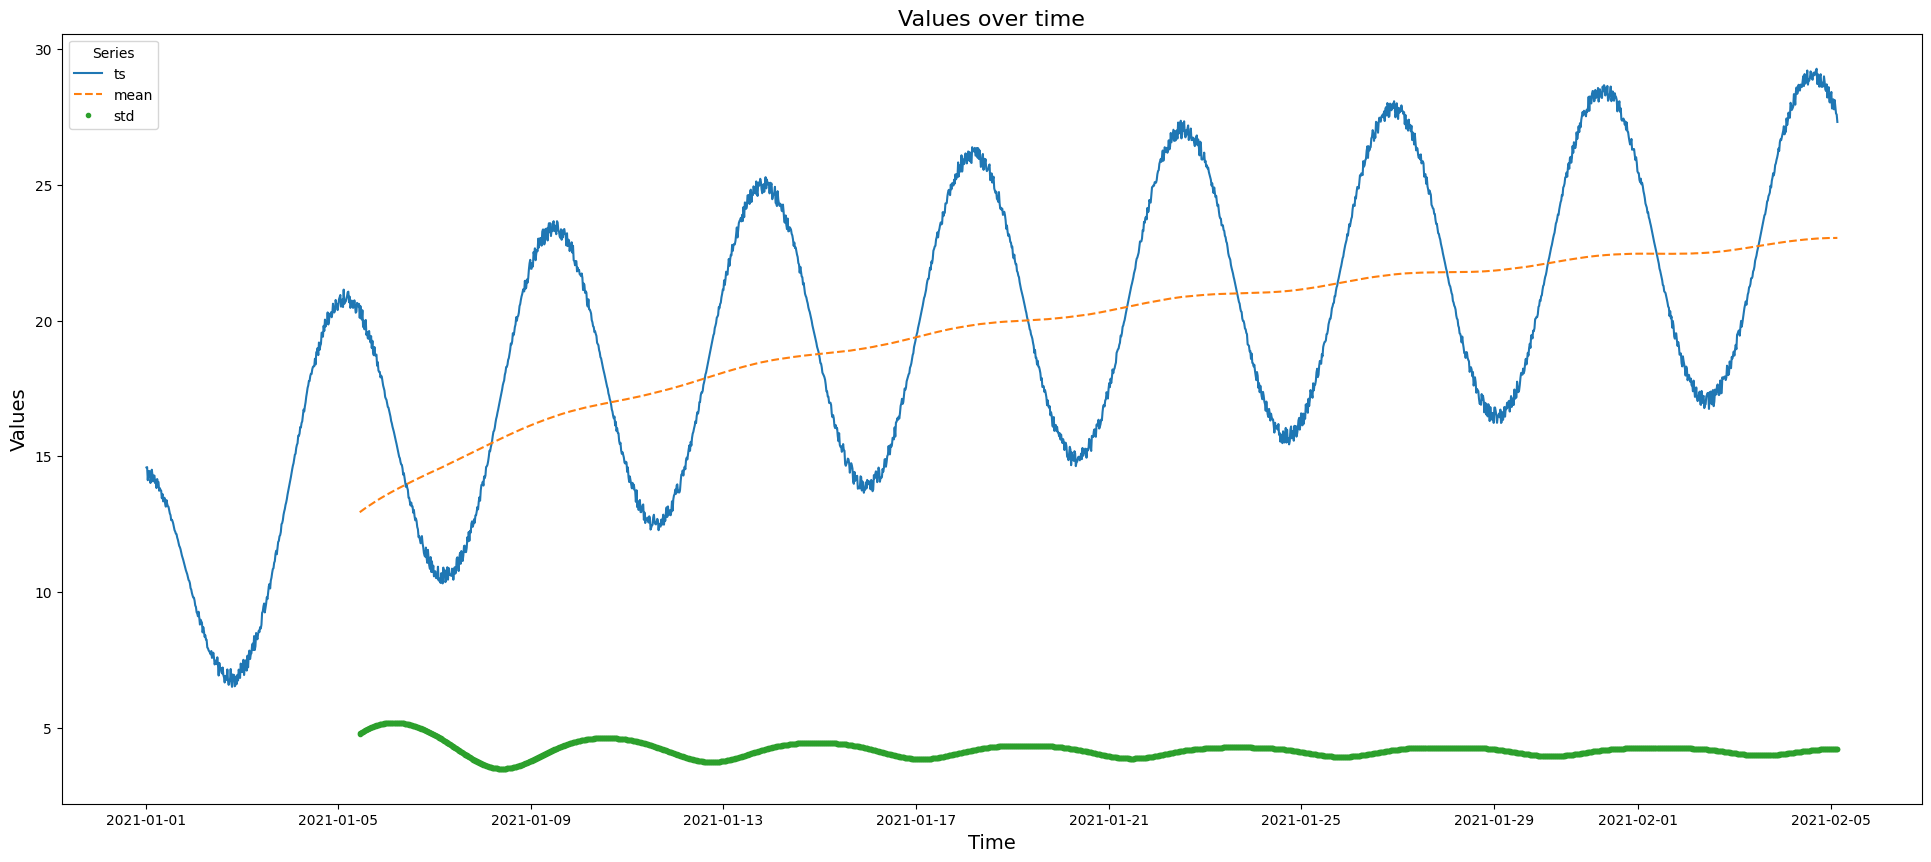

In [26]:
#define size
plt.figure(figsize=(24,10))
#add axes labels and a title
plt.ylabel('Values', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Values over time', fontsize=16)

plt.plot(tsr, "-", label = 'ts')
plt.plot(tsr.rolling(window=320).mean(),"--",label = 'mean')
plt.plot(tsr.rolling(window=320).std(),".",label = 'std')
#add legend
plt.legend(title='Series')

In [8]:
# try to predict trend: Extract TREND
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(tsr, model='additive', period=320)  
trend = result.trend
seasonal = result.seasonal

In [9]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [14]:
adf_test(seasonal, title='trend')

Augmented Dickey-Fuller Test: trend
ADF test statistic     -1.814958e+01
p-value                 2.478043e-30
# lags used             2.700000e+01
# observations          2.502000e+03
critical value (1%)    -3.432966e+00
critical value (5%)    -2.862696e+00
critical value (10%)   -2.567385e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [11]:
##Differencing

In [15]:
tsrdiff = tsr.diff() #first order
tsrdiff2 = tsrdiff.diff() #second order

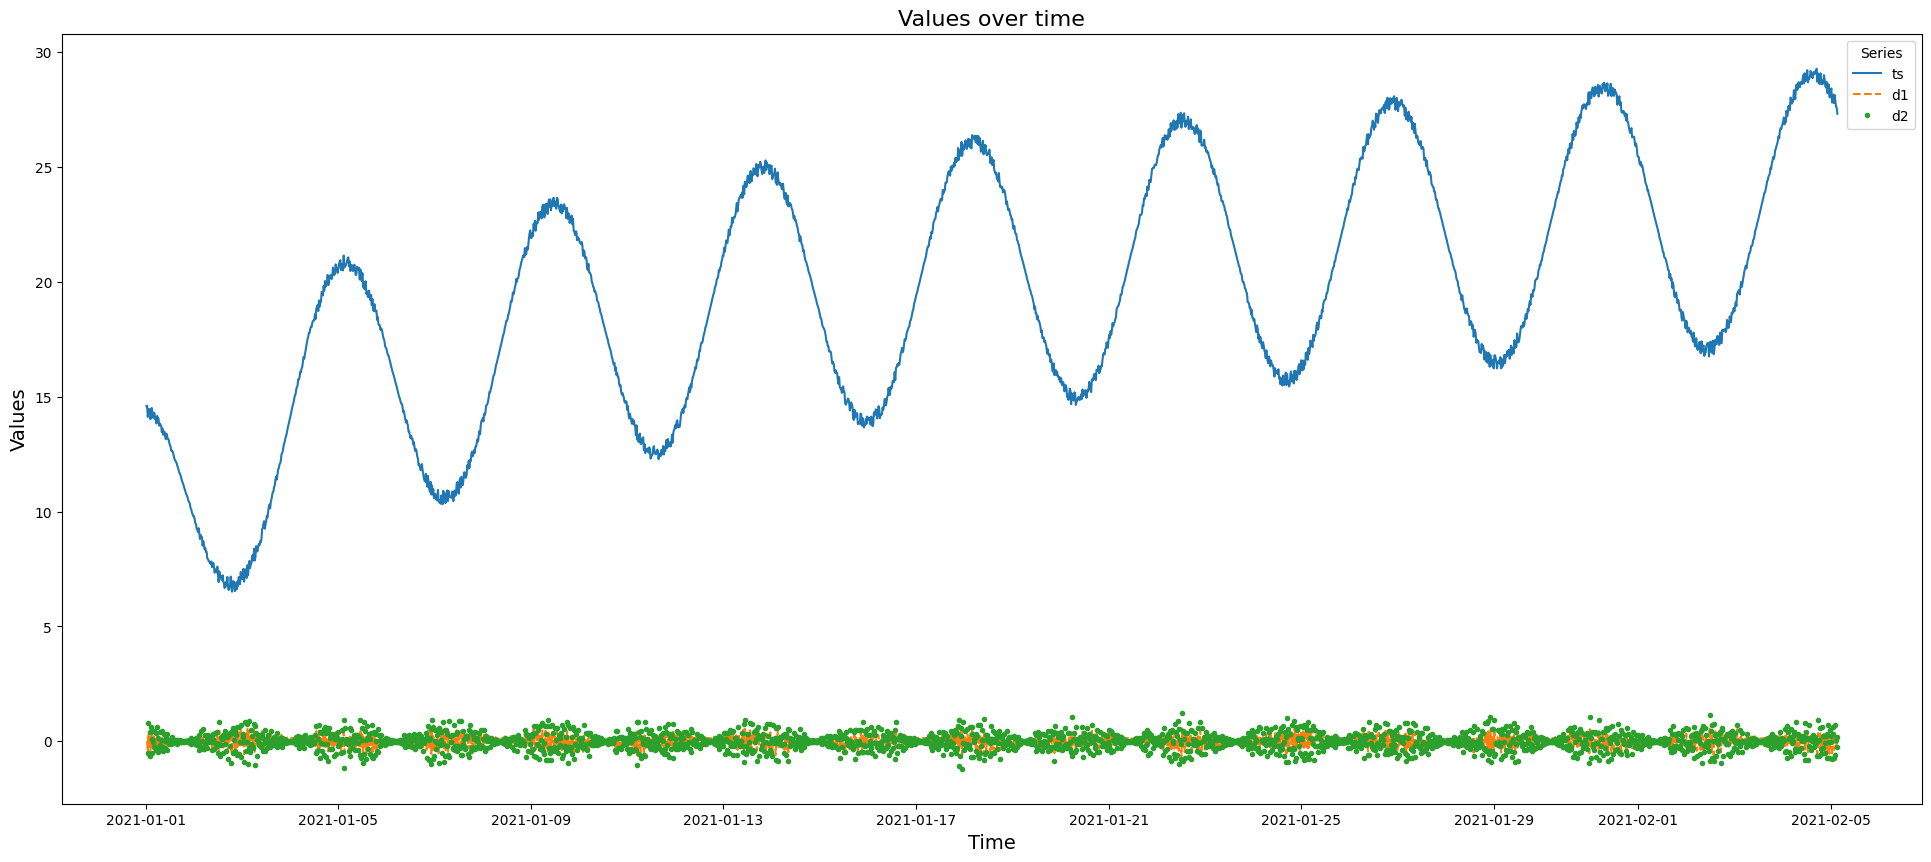

In [16]:
#define size
plt.figure(figsize=(24,10))
#add axes labels and a title
plt.ylabel('Values', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Values over time', fontsize=16)

plt.plot(tsr, "-", label = 'ts')
plt.plot(tsrdiff,"--",label = 'd1')
plt.plot(tsrdiff2,".",label = 'd2')
#add legend
plt.legend(title='Series')

<AxesSubplot: xlabel='Time'>

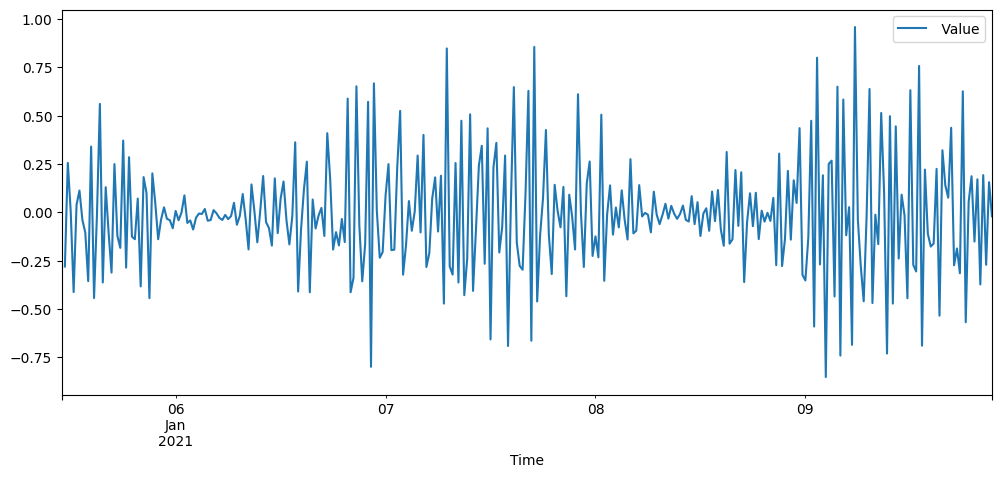

In [17]:
tsrdiff320 = tsrdiff.diff(320) #try to remove seasonability
tsrdiff320.iloc[320:640].plot(figsize=(12,5))

In [18]:
adf_test(trend, title='dif')

Augmented Dickey-Fuller Test: dif
ADF test statistic        -3.256353
p-value                    0.016946
# lags used               26.000000
# observations          2183.000000
critical value (1%)       -3.433349
critical value (5%)       -2.862865
critical value (10%)      -2.567475
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


<AxesSubplot: xlabel='y(t)', ylabel='y(t + 1)'>

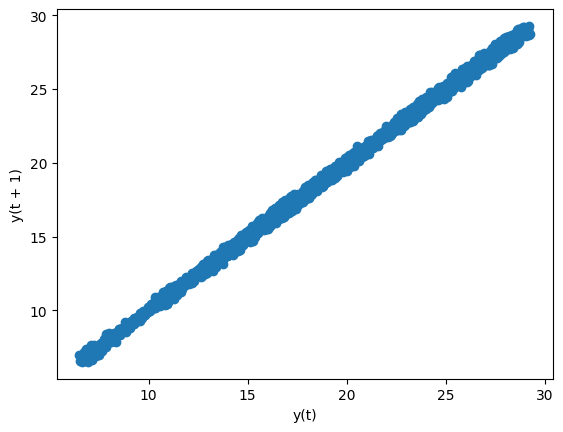

In [19]:
#Lags plot
from pandas.plotting import lag_plot

lag_plot(tsr) #Strongly correlated; as y_t values increase, nearby (lagged) values also increase.

<AxesSubplot: xlabel='y(t)', ylabel='y(t + 1)'>

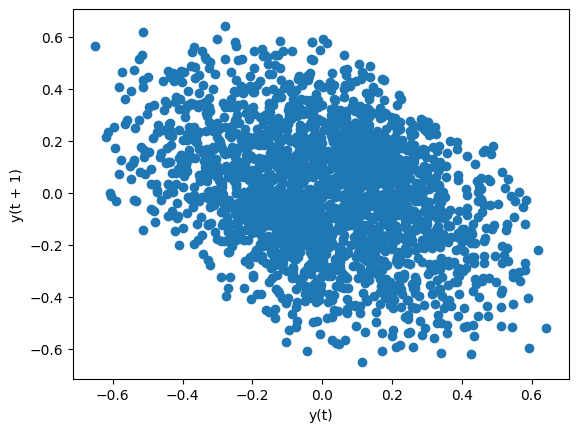

In [20]:
lag_plot(tsr.diff()) # little evidence of autocorrelation

In [21]:
#ACF
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


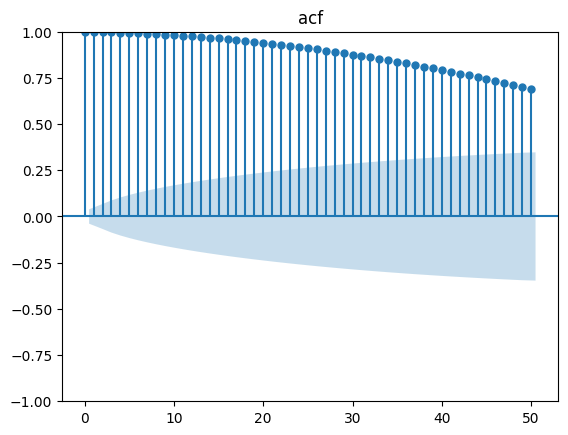

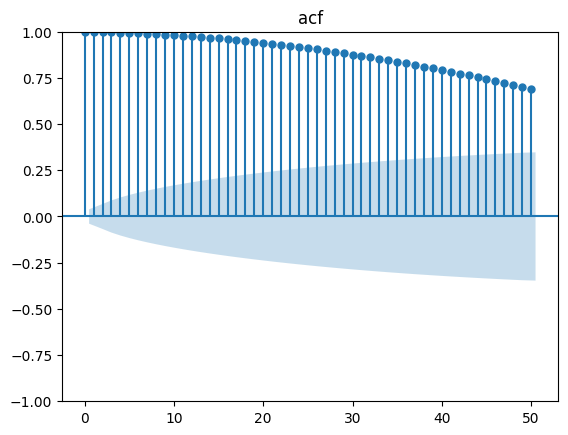

In [22]:
plot_acf(tsr,title='acf',lags=50) #non stationary data decrease very slow
#Confidence intervals (light blue) is set to a 95% confidence interval
#Correlation values outside of these intervals are very likely a correlation and not a statistical issue.

/Users/gmorana/PycharmProjects/pythonProject1/venv/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


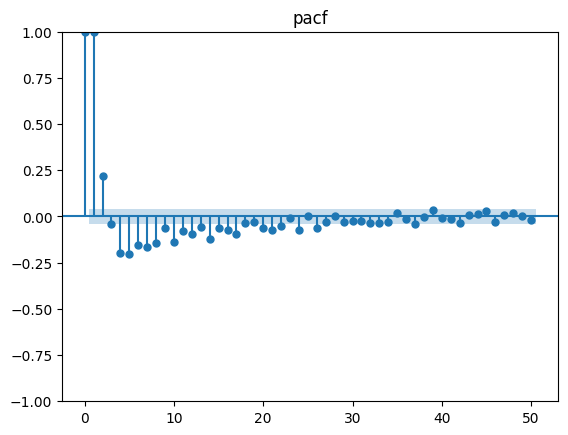

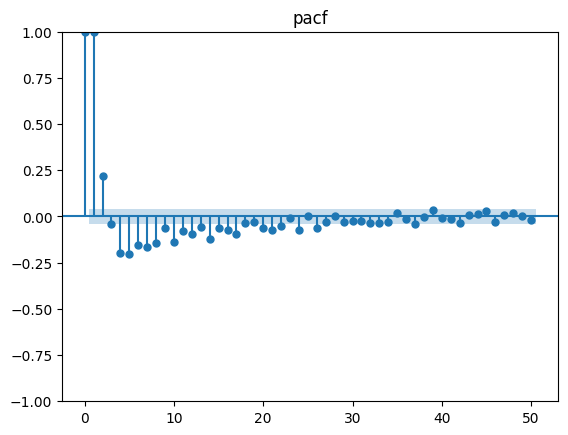

In [23]:
plot_pacf(tsr,title='pacf',lags=50) 

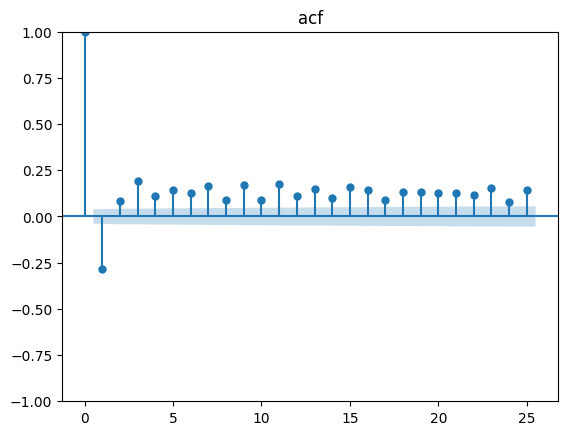

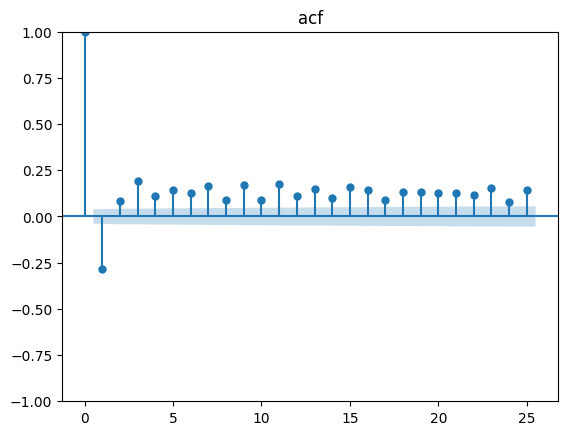

In [24]:
#Plot of PACF
tsrd = tsr.diff()
tsrd = tsrd.dropna()
plot_acf(tsrd,title='acf',lags=25) #stationary data decrease very fast


If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing.